In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LinearRegression

path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'

In [3]:
df = pd.read_csv(path + '/30538.csv')
print(df)

                       x  major  minor  rssi  txpower  est_dist  \
0      c2:02:0b:00:05:4e  40001  30538   -70      -59      2.71   
1      c2:02:0b:00:05:4e  40001  30538   -67      -59      2.22   
2      c2:02:0b:00:05:4e  40001  30538   -71      -59      2.90   
3      c2:02:0b:00:05:4e  40001  30538   -69      -59      2.54   
4      c2:02:0b:00:05:4e  40001  30538   -70      -59      2.71   
...                  ...    ...    ...   ...      ...       ...   
63432  c2:02:0b:00:05:4e  40001  30538   -71      -59      2.90   
63433  c2:02:0b:00:05:4e  40001  30538   -71      -59      2.90   
63434  c2:02:0b:00:05:4e  40001  30538   -66      -59      2.08   
63435  c2:02:0b:00:05:4e  40001  30538   -78      -59      4.61   
63436  c2:02:0b:00:05:4e  40001  30538   -72      -59      3.09   

                   time  real_dist  
0      2021.11.16 14:20          2  
1      2021.11.16 14:20          2  
2      2021.11.16 14:20          2  
3      2021.11.16 14:20          2  
4      202

In [10]:

file_list = ['30528.csv', '30538.csv','30547.csv','30549.csv','30550.csv','30556.csv','30557.csv']  # 추가로 불러올 파일이 있다면, 이 리스트에 파일명을 추가해주세요.

df_list = []

for file in file_list:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    
    # 'rssi'와 'est_dist','real_dist' 컬럼만 추출
    df = df[['rssi', 'est_dist','real_dist']]
    df_list.append(df)

# 모든 데이터프레임을 하나로 합치기
final_df = pd.concat(df_list)

# 결과를 새 csv 파일에 저장
final_df.to_csv(os.path.join(path, 'final_output.csv'), index=False)




In [5]:
rssi_data = df[['rssi','est_dist']]
rssi_data.to_csv('rssi_data.csv', index=False)


In [24]:
#df1 = pd.read_csv(path + '/rssi_data.csv')
#print(df1)

       rssi
0       -64
1       -62
2       -65
3       -64
4       -66
...     ...
67646   -64
67647   -57
67648   -58
67649   -58
67650   -65

[67651 rows x 1 columns]


In [6]:
rssi_data_plt = pd.read_csv(path + '/final_output.csv')
print(rssi_data_plt)
rssi = rssi_data_plt['rssi']
est_dist  = rssi_data_plt['est_dist']


        rssi  est_dist
0        -64      1.82
1        -62      1.59
2        -65      1.94
3        -64      1.82
4        -66      2.08
...      ...       ...
418369   -76      4.04
418370   -75      3.78
418371   -86      7.84
418372   -75      3.78
418373   -84      6.87

[418374 rows x 2 columns]


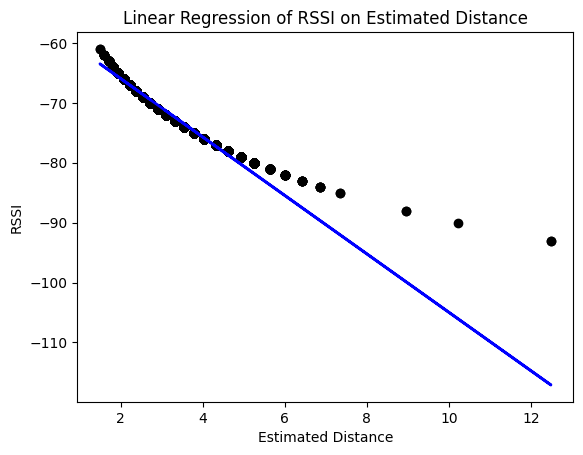

In [105]:
rssi_data = df[['rssi']]
est_distance = df[['est_dist']] 

# 선형 회귀 모델 생성 및 학습
model = LinearRegression().fit(est_distance,rssi_data)

# 회귀선을 위한 예측값 생성
rssi_pred = model.predict(est_distance)

# 원래 RSSI 데이터와 회귀선 그리기
plt.scatter(est_distance, rssi_data, color='black')
plt.plot(est_distance, rssi_pred, color='blue', linewidth=2)

# x축, y축 라벨 및 그래프 제목 설정
plt.xlabel('Estimated Distance')
plt.ylabel('RSSI')
plt.title('Linear Regression of RSSI on Estimated Distance')

plt.show()


Original RSSI Values: [-64, -62, -65, -64, -66, -64, -60, -65, -65, -63, -63, -62, -64, -62, -62, -65, -66, -64, -62, -62, -61, -64, -63, -60, -61, -67, -65, -61, -61, -63, -63, -61, -66, -64, -67, -60, -61, -67, -63, -63, -67, -65, -64, -61, -66, -64, -61, -62, -63, -63, -63, -66, -67, -61, -62, -67, -65, -65, -61, -66, -66, -63, -61, -65, -67, -63, -68, -65, -61, -61, -66, -66, -62, -67, -63, -66, -65, -64, -62, -66, -66, -63, -61, -66, -64, -66, -62, -62, -61, -66, -66, -63, -63, -65, -63, -63, -66, -63, -61, -61, -67, -61, -62, -63, -62, -62, -67, -63, -64, -63, -61, -64, -63, -60, -62, -66, -68, -65, -61, -61, -64, -63, -62, -62, -62, -66, -63, -65, -65, -66, -66, -66, -64, -67, -70, -63, -61, -66, -64, -60, -66, -66, -65, -63, -63, -61, -64, -60, -64, -64, -63, -64, -61, -63, -61, -65, -61, -66, -63, -61, -67, -64, -63, -62, -64, -61, -65, -66, -63, -64, -64, -66, -67, -65, -61, -65, -65, -64, -61, -63, -62, -65, -62, -67, -63, -65, -61, -66, -65, -64, -60, -66, -65, -65, -65, -6

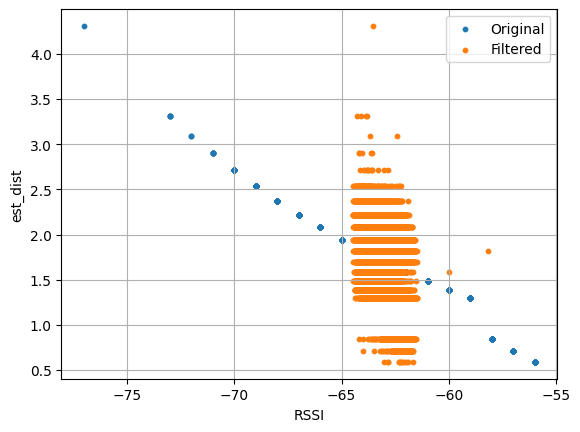

In [64]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(path + '/30528.csv')


class KalmanFilter():
    def __init__(self):
        self.Q = 1e-5  # Process noise covariance
        self.R = 0.1  # Measurement noise covariance
        self.x = 0  # Initial state (RSSI)
        self.P = 1  # Initial state covariance

    def filtering(self, measurement):
        # Prediction
        x_pred = self.x
        P_pred = self.P + self.Q

        # Update
        K = P_pred / (P_pred + self.R)
        self.x = x_pred + K * (measurement - x_pred)
        self.P = (1 - K) * P_pred

        return self.x
def apply_kalman_filter(file_path):
    # Read CSV file into a DataFrame

    # Extract the 'rssi' and 'est_dist' columns from the DataFrame
    rssi_data = []
    est_dist_data = []

    for i in range(67651): # 67650까지 인덱스를 포함하기 위해 67651까지 범위 설정
        rssi_data.append(df.loc[i, 'rssi'])
        est_dist_data.append(df.loc[i, 'est_dist'])
        rssi_data = df['rssi'].tolist()
        est_dist_data = df['est_dist'].tolist()


    # Kalman filter initialization
    kalman = KalmanFilter()

    # Apply Kalman filter to the RSSI data
    filtered_rssi = [kalman.filtering(rssi) for rssi in rssi_data]

    # Print the number of preprocessed data
    
    # Apply zero padding to the filtered data
    max_len = max(len(rssi_data), len(filtered_rssi))
    #rssi_data = np.pad(rssi_data, (0, max_len - len(rssi_data)), 'constant')
    filtered_rssi = np.pad(filtered_rssi, (0, max_len - len(filtered_rssi)), 'constant')

    # Output results
    print("Original RSSI Values:", rssi_data)
    print("Filtered (and zero-padded) RSSI Values:", filtered_rssi)
    print("Number of Preprocessed Data:", len(filtered_rssi))
    print("Number of Raw Data:", len(rssi_data))
    # Plotting the data
    plt.scatter(rssi_data, est_dist_data, label='Original',s=10)
    plt.scatter(filtered_rssi, est_dist_data, label='Filtered', s=10)
    plt.xlabel('RSSI')
    plt.ylabel('est_dist')
    plt.grid(True)
    plt.legend()
    plt.show()
    # Create a DataFrame from the filtered RSSI and estimated distance data
    df_filtered = pd.DataFrame({
        'filtered_rssi': filtered_rssi,
        'est_dist': est_dist_data
    })
    df_rssidata = pd.DataFrame({
        'rssi_data' : rssi_data,
        'est_dist':est_dist_data
    })
# Save the DataFrame to a CSV file
    df_filtered.to_csv(file_path + 'filtered_rssi_est_dist.csv', index=False)
    df_rssidata.to_csv(file_path + 'rssidata.csv', index=False)

# Specify the correct file path
file_path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'
apply_kalman_filter(file_path)




In [93]:
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
files = ['30528.csv', '30538.csv', '30547.csv', '30549.csv', '30550.csv', '30556.csv', '30557.csv']
dataframes = []

for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)
# 데이터프레임 추출
rssi = pd.DataFrame(dataframes[0]['rssi'][0:63437])
realdist = pd.DataFrame(dataframes[0]['real_dist'][0:63437])
rssi1 = pd.DataFrame(dataframes[1]['rssi'][0:63437])
realdist1 = pd.DataFrame(dataframes[1]['real_dist'][0:63437])
rssi2 = pd.DataFrame(dataframes[2]['rssi'][0:55919])
realdist2 = pd.DataFrame(dataframes[2]['real_dist'][0:55929])
rssi3 = pd.DataFrame(dataframes[3]['rssi'][0:64332])
realdist3 = pd.DataFrame(dataframes[3]['real_dist'][0:64332])
rssi4 = pd.DataFrame(dataframes[4]['rssi'][0:54417])
realdist4 = pd.DataFrame(dataframes[4]['real_dist'][0:54417])
rssi5 = pd.DataFrame(dataframes[5]['rssi'][0:58881])
realdist5 = pd.DataFrame(dataframes[5]['real_dist'][0:58881])
rssi6 = pd.DataFrame(dataframes[6]['rssi'][0:53732])
realdist6 = pd.DataFrame(dataframes[6]['real_dist'][0:53732])
#데이터 프레임 합치기
# rssi 데이터 합치기
rssi_all = pd.concat([rssi, rssi1, rssi2, rssi3, rssi4, rssi5, rssi6], ignore_index=True , axis=0)

# realdist 데이터 합치기
realdist_all = pd.concat([realdist, realdist1, realdist2, realdist3, realdist4, realdist5, realdist6], ignore_index=True, axis = 0)

# 두 데이터를 하나의 데이터프레임으로 만들기
final_data = pd.DataFrame()
final_data['t_rssi'] = rssi_all
final_data['t_realdist'] = realdist_all

print(final_data)
final_data.to_csv(file_path + 'rsssi_realdist.csv', index=False)

#데이터 프레임 각 컬럼 별 선언 
t_rssi = pd.DataFrame(final_data['t_rssi'])
t_realdist = pd.DataFrame(final_data['t_realdist'])

        t_rssi  t_realdist
0          -64           1
1          -62           1
2          -65           1
3          -64           1
4          -66           1
...        ...         ...
414150     -85           7
414151     -87           7
414152     -87           7
414153     -76           7
414154     -75           7

[414155 rows x 2 columns]


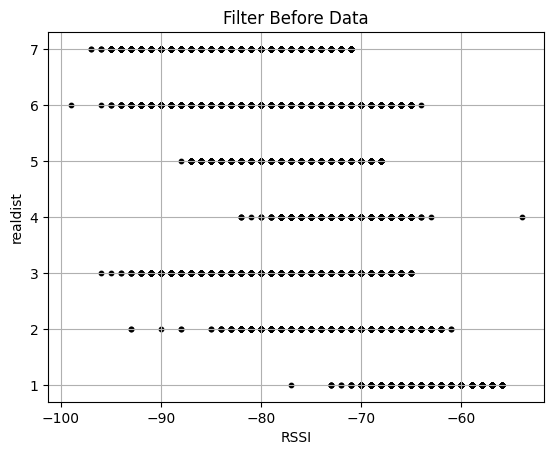

In [99]:
plt.scatter(t_rssi, t_realdist.values.reshape(-1,1), color='k', s=10)
plt.title('Filter Before Data')
plt.xlabel('RSSI')
plt.ylabel('realdist')
plt.grid(True)
plt.show()
